<a href="https://colab.research.google.com/github/Natural-Language-Processing-YU/Exercises/blob/main/M7_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt


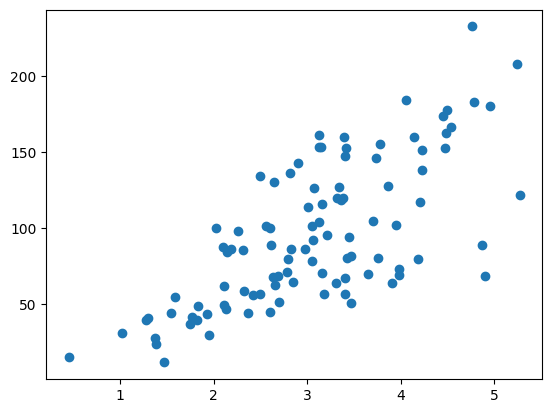

In [23]:
np.random.seed(0)

# Generate 'hours of studying' data
hours_studying = np.random.normal(3.0, 1.0, 100)

# Generate 'grades' data
grades = hours_studying * np.random.normal(30.0, 10.0, 100)

# Plot the data
plt.scatter(hours_studying, grades)
plt.show()


 The cost function that we're going to use is the sum of squared residuals (SSR). SSR is the sum of the squared differences between the actual and predicted values.

Mathematically, it is represented as:

$$
J(m, b) = \frac{1}{N}\sum_{i=1}^{N}(y_i - (mx_i + b))^2
$$

Here, $y_i$ is the actual value, $mx_i + b$ is the predicted value, and $N$ is the total number of observations.


In [24]:
def compute_cost(m, b, X, Y):
    total_cost = 0
    N = len(X)

    for i in range(N):
        x = X[i]
        y = Y[i]
        total_cost += (y - (m*x + b))**2

    return total_cost/N


In [25]:
def gradient_descent(m_current, b_current, X, Y, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(X))

    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))

    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    return m_updated, b_updated


In [26]:
m = 0
b = 0
learning_rate = 0.0001


Gradient descent is an optimization algorithm that's used to minimize the cost function. It does this by iteratively moving in the direction of steepest descent, defined by the negative of the gradient.

The gradients for $m$ and $b$ are calculated as:

$$
\frac{dJ}{dm} = - \frac{2}{N} \sum_{i=1}^{N} x_i(y_i - (mx_i + b))
$$

$$
\frac{dJ}{db} = - \frac{2}{N} \sum_{i=1}^{N} (y_i - (mx_i + b))
$$

We update $m$ and $b$ using a learning rate ($\alpha$) as follows:

$$
m_{\text{new}} = m_{\text{current}} - \alpha * \frac{dJ}{dm}
$$

$$
b_{\text{new}} = b_{\text{current}} - \alpha * \frac{dJ}{db}
$$

In a Jupyter notebook, you can add these LaTeX equations in a markdown cell. The `$` sign is used to start and end a LaTeX equation. For inline equations use single dollar signs, and for block equations (those that appear on their own line), use double dollar signs.

In [ ]:
num_iterations = 1000
for i in range(num_iterations):
    m, b = gradient_descent(m, b, hours_studying, grades, learning_rate)
    if i % 100 == 0:
        print(f"Iteration {i}: m = {m}, b = {b}, cost = {compute_cost(m, b, hours_studying, grades)}")

        plt.figure(i // 100)  # Creates a new figure for each plot
        plt.scatter(hours_studying, grades)
        pred = m * hours_studying + b
        plt.plot(hours_studying, pred, color='red')
        plt.title(f'Line of best fit at iteration {i}')
        plt.show()


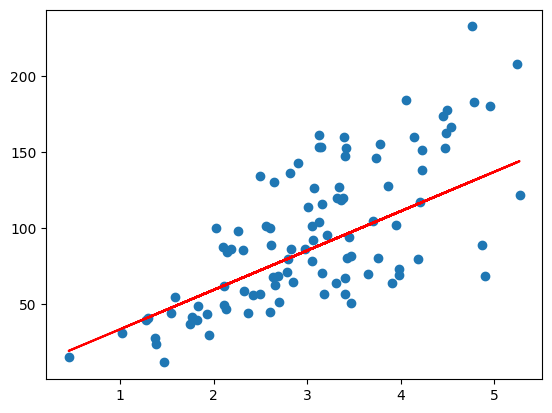

In [28]:
plt.scatter(hours_studying, grades)
pred = m * hours_studying + b
plt.plot(hours_studying, pred, color='red')
plt.show()
